# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [21]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

plt.style.use("seaborn-v0_8")

### Generation of data

In [12]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [13]:
N_train = 10**4  # number of training samples

rng = np.random.default_rng()

# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = rng.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + rng.standard_normal(
    xtrain.shape
)  # train data includes some noise

In [14]:
print(f"{xtrain.shape = }")
print(f"{ytrain.shape = }")

xtrain.shape = (10000, 1)
ytrain.shape = (10000, 1)


Simulate test data

In [15]:
N_test = 10000  # number of testing samples

xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [16]:
print(f"{xtest.shape = }")
print(f"{ytest.shape = }")

xtest.shape = (10000,)
ytest.shape = (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [26]:
nb_nodes = 100
nb_layers = 5
activation = "relu"

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, input_dim=xtrain.shape[1]))  # first layer

for i in range(1, nb_layers):
    model.add(layers.Dense(nb_nodes, activation=activation))

model.add(layers.Dense(1))  # final layer

print(model.summary())

/home/damian/miniforge3/envs/adl/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "1Dfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,701 (158.99 KB)

 Trainable params: 40,701 (158.99 KB)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [27]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="MSE", optimizer=adam)

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [28]:
epochs = 100
save_period = 20   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint(
    "weights-{epoch:02d}.weights.h5",
    save_weights_only=True,
    save_freq=save_period
)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
)

Epoch 1/100


I0000 00:00:1763037112.527822 4175785 service.cc:152] XLA service 0x7d6d6001ed60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763037112.527867 4175785 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1763037112.527876 4175785 service.cc:160]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2025-11-13 13:31:52.605641: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763037112.892139 4175785 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-11-13 13:31:54.742390: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_224', 16 bytes spill stores, 16 bytes spill loads

2025-11-13 13:31:54.893727: I external/local_xla/xla/stream_executor/cuda/sub

 15/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.4189

I0000 00:00:1763037116.913595 4175785 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 4.7011
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.3873
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.0638
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.8131
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.5638
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.5495
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.4003
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3127
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3329
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2202
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2464
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1565
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.0516
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0467
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 

Compare the performance of the model during the training. You may use the skeleton below:

2025-11-13 13:35:04.725663: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_30', 8 bytes spill stores, 8 bytes spill loads

2025-11-13 13:35:04.856002: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_23', 120 bytes spill stores, 120 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


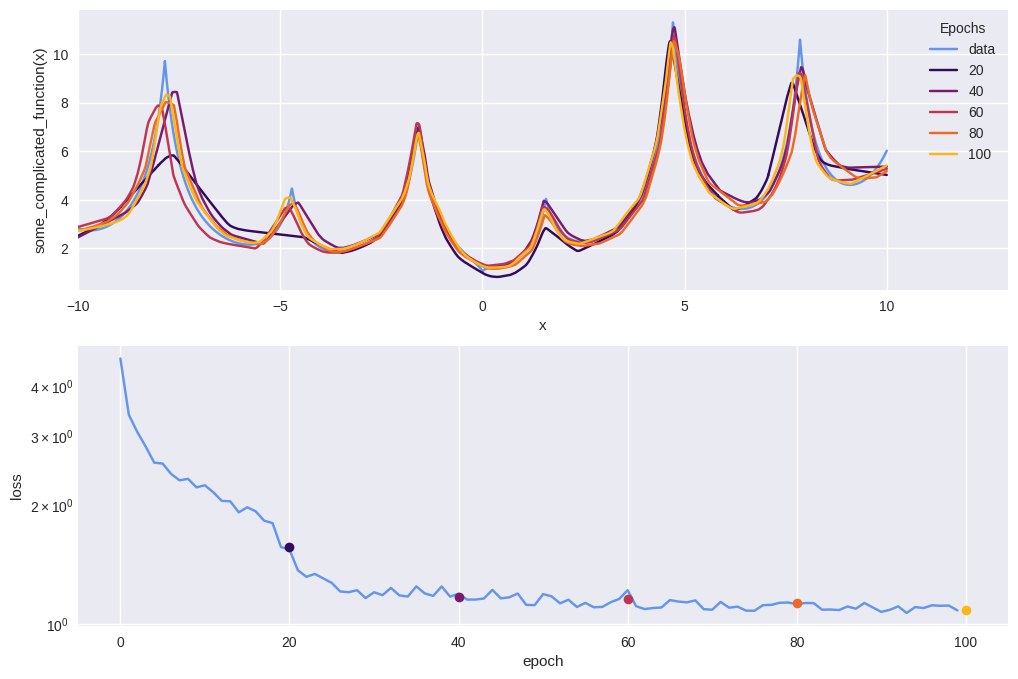

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="#6495ED", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [
    plt.cm.inferno((i + 1) / float(len(saved_epochs) + 1))
    for i in range(len(saved_epochs))
]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.weights.h5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(
        epoch,
        results.history["loss"][epoch - 1],
        color=colors[i],
        marker="o",
        zorder=10,
    )

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="#6495ED")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()